In [1]:
import subprocess
import matplotlib
import matplotlib.pyplot as plt
import psrchive
from astropy.modeling import models, fitting
import os.path
import glob
import numpy as np

In [2]:
pwd = os.getcwd()
print pwd

/home/psr/eleni/Fundi_toturial


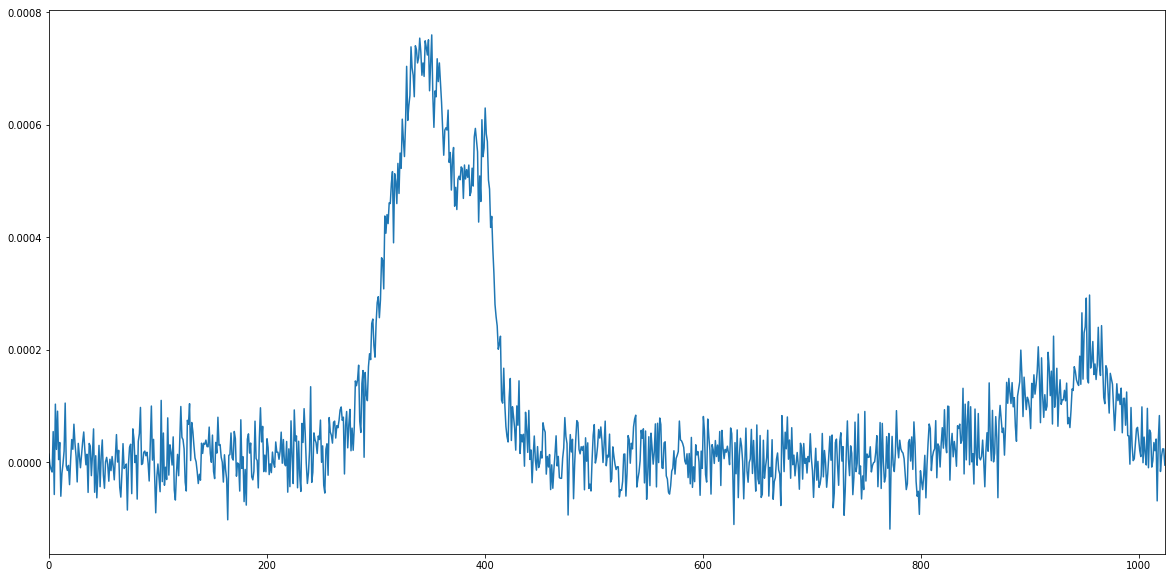

In [3]:
arch = psrchive.Archive_load(pwd+"/B1855+09/P217-3/2012/B1855+09_ASTERIX_P217-3_20121209_61780.clean")
arch.fscrunch()
arch.tscrunch()
arch.pscrunch()
arch.remove_baseline()
data = arch.get_data()
#########
initial_archive = data[0, 0, 0, :]

fig1 = plt.figure(figsize=(20,10))
plt.plot(np.linspace(0, len(data[0, 0, 0, :]), len(data[0, 0, 0, :])), initial_archive)
plt.xlim(0, arch.get_nbin())
plt.show()

[  7.17243533e-04   3.45261331e+02   3.19075263e+01   3.78890220e-04
   3.98639061e+02   1.05711389e+01   1.25088447e-04   9.22645778e+02
   5.00204574e+01   9.91020371e-05   9.60137366e+02   1.33076133e+01]


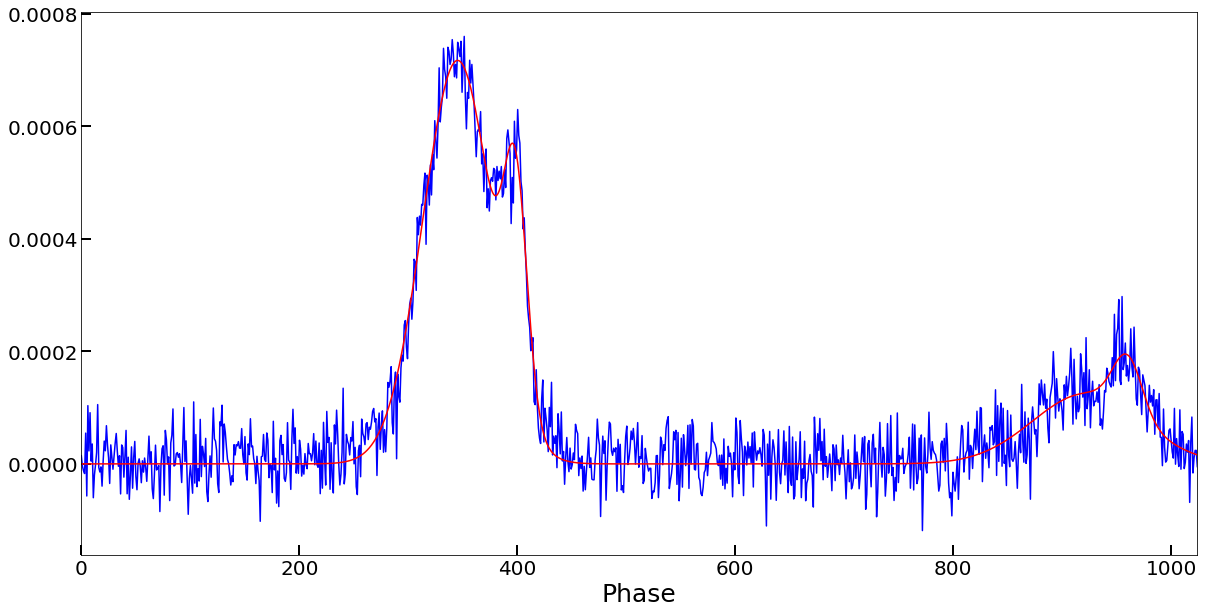

In [4]:
position = [0.0007, 300, 30, 0.0006, 400, 10, 0.00025, 900, 50, 0.0001, 950, 10]

for i in range(0, len(position)/3):
                if i ==0:
                    gg = models.Gaussian1D(position[i*3], position[i*3+1], position[i*3+2])
                else:
                    gg = gg + models.Gaussian1D(position[i*3], position[i*3+1], position[i*3+2])
fitter = fitting.LevMarLSQFitter()
gg_fit = fitter(gg, np.linspace(0, len(initial_archive), len(initial_archive)), initial_archive)
gaussian = gg_fit(np.linspace(0, len(initial_archive), len(initial_archive)))

print gg_fit.parameters

plt.figure(figsize=(20,10))
plt.plot(np.linspace(0, len(initial_archive), len(initial_archive)) , initial_archive, 'b-')
plt.plot(np.linspace(0, len(gaussian), len(gaussian)) , gaussian, 'r-')
plt.xlim(0, 1024)
plt.tick_params(axis="both", direction="in", length=10, width=2, labelsize = 20)
plt.xlabel('Phase', fontsize=25)

# Test the fitting with Kolmogorov-Smirnov test

In [5]:
from scipy.stats import chisquare, kstest, ks_2samp, ttest_ind

In [6]:
residuals = gaussian - initial_archive
ks_2samp(initial_archive[600:750], residuals[280:450])

Ks_2sampResult(statistic=0.10588235294117648, pvalue=0.31632257526142277)

In [7]:
ks_2samp(initial_archive[600:750], residuals[810:1000])

Ks_2sampResult(statistic=0.072982456140350899, pvalue=0.74775883921065445)